# Codigo de la Pregunta 2

<b> Importante: Tener la imagen texto.jpg en la misma carpeta para poder ver los resultado, si usas otra imagen texto.jpg <br>
    evita que la imagen sea muy larga para evitar stackoverflow <br><br><br>

El ejercicio requeria de tener una imagen con palabras y encuadrar cada letra por separado.
Para esto se requiere una serie de pasos a seguir:


<ul>
<li>Cargar la Imagen</li>
<li>Convertir la Imagen a blanco y negro </li>
<li>Encontrar los componentes conexos y etiquetarlos </li>
<li>En base a cada componente conexo encontrar su Xminimo,Yminimo,Xmaximo,Ymaximo </li>
<li>Mostrar el Resultado</li>
</ul>

## Importar las liberias

Para poder ejecutar el codigo de manera correcta necesitamos una serie de librerias:
<ul>
<li> numpy(np) </li>
<li> pyplot(plt) </li>
<li> cv2 </li>
<li> time </li>
</ul>

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 
import time

## Cargar y mostrar imagenes

Para mostrar las imagenes y luego de manera posterior mostrar el resultado se utiliza las siguientes funciones:

In [4]:
def cargar(direccion):
    img = cv2.imread(direccion) #cargamos la imagen de la  direccion dada
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #convertimos la imagen de BGR a RGB
    return img

def show(imagen):
    plt.imshow(imagen) #Cargamos la imagen en el plot
    plt.show() #Mostramos el plot
    pass

Ademas, necesitamos trabajar con blanco y negro, por lo tanto creamos una funcion para poder convertirlo a gris, y luego aplicar un threshold

In [5]:
def gray(image): #Convierte a Gris
    img = np.copy(image)
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return img

def binary(image): #Aplica un treshold
    img = np.copy(image)
    sx,sy = np.size(img,0),np.size(img,1)
    for n in range(0,sx):
        for m in range(0,sy):
            if img[n][m] > 128:
                img[n][m] = 255
            else:
                img[n][m] = 0
    return img


Por otro lado, esta imagen no sera representada adecuandamente con el codigo de show(), por lo tanto, se utilizara la funcion back_gray()

In [6]:
def back_gray(image):
    img = np.copy(image)
    img = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
    return img

## Recursividad y etiquetado

Al recorrer la matriz de la imagen blanco y negro, una vez encontrado un punto de color negro se empieza a etiquetar toda la imagen, por ventaja para el trabajo, el llenado tambien obtiene un arreglo el cual agrega cada uno de los puntos de la imagen

In [7]:
def recorrer(mat,x,y,ar):
    go = False
    if(mat[x][y] == 0):
        go = True
        ar.append([x,y])
    mat[x][y] = 155
    if(go):
        recorrer(mat,x+1,y,ar)
        recorrer(mat,x,y-1,ar)
        recorrer(mat,x,y+1,ar)
        recorrer(mat,x-1,y,ar)
        recorrer(mat,x+1,y-1,ar)
        recorrer(mat,x+1,y+1,ar)
        recorrer(mat,x-1,y+1,ar)
        recorrer(mat,x-1,y-1,ar)
    return 

## Xmin,Xmax,Ymin,Ymax

Ahora luego usando la matriz optenida anteriormente, encontramos los extremos de la letra, y le añadimos uno para que sea los bordes del mismo

In [8]:
def get_pos(ar): #Se entrega como dato el arreglo
    s = np.size(ar,0)
    xmax,ymax,xmin,ymin = ar[0][0],ar[0][1],ar[0][0],ar[0][1] #Inicializamos los valores
    for i in range(0,s):
        xmax = max(xmax,ar[i][0])
        ymax = max(ymax,ar[i][1])
        xmin = min(xmin,ar[i][0])
        ymin = min(ymin,ar[i][1])
    return [xmin,ymin,xmax,ymax] #Retornamos los valores

##----Existia un metodo más facil, pero por el tiempo no lo use ----##

## Pintado de bordes 

 Una vez obtenido los bordes de la letras, estas se pintan en la imagen(la cual se recibe como parametro):

In [9]:
def pintar(img,ar): #Recibe la imagen y los datos de ar = [xmin,ymin,xmax,ymax]
    for i in range(ar[1],ar[3]):
        img[ar[0]][i] = 10
        img[ar[2]][i] = 10
    for i in range(ar[0],ar[2]):
        img[i][ar[1]] = 10
        img[i][ar[3]] = 10
    return img

## Recorrer la imagen y entregar la matriz de posiciones:

El codigo anterior funciona para una letra, ahora aplicamos este codigo en <b> un FOR </b> para que se realize a lo largo de la imagen:

In [1]:
def recorrer2(image):
    img = np.copy(image) #genera una copia
    sx,sy = np.size(img,0),np.size(img,1) #Agarra el tamaño de la imagen
    cubs = [] #Matriz de direcciones
    ar = [] #Matriz temporal para cuardar todos los puntos de una misma palabra
    for m in range(0,sx):
        for n in range(0,sy):
            ar = []
            if img[m][n] == 0:
                recorrer(img,m,n,ar)
                cubs.append(get_pos(ar))
    return cubs #Retorna un arreglo de posiciones

## Codigo Finalizado

Una vez concluida todas las funciones, es momento de probar el codigo y ver los resultados, para esto se creo la funcion testing():

In [23]:
def testing():
    text = cargar("text.jpg") #Cambiar el string si se quiere otra imagen
    btext = gray(text) #Escala de grises
    btext = binary(btext) #Treshold
    lala = recorrer2(btext) #Hallo los puntos
    for i in range(0,np.size(lala,0)):
        pintar(btext,lala[i]) #Pinto
    btext = back_gray(btext) #Regreso a RGB para mostrar
    show(btext) #Muestro
    pass

## Resultado 

Palabra sencilla:<br>

![title](holi2.jpg)

Un monton de palabras: <br>![title](holi.jpg) <br>
<b>No se nota bien por cuestion de resolucion>/b>

Para correr el codigo solo ejecute la linea de abajo:

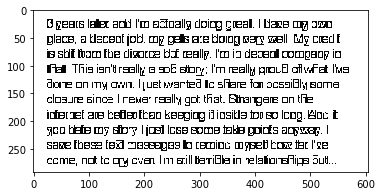

In [21]:
testing()